## Load Data


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sample_data/Customer_Churn Prediction_Dataset.csv')

# Display the first 5 rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())

# Print the data types of each column
print('\nData types of each column:')
df.info()

# Generate descriptive statistics for numerical columns
print('\nDescriptive statistics for numerical columns:')
print(df.describe())

First 5 rows of the DataFrame:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Strea

## Data Pre-processing

In [2]:
import numpy as np

# 1. Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Converted 'TotalCharges' column to numeric, coercing errors to NaN.")

# 2. Identify and handle missing values in 'TotalCharges'
missing_total_charges = df['TotalCharges'].isnull().sum()
print(f"Number of missing values in 'TotalCharges' before filling: {missing_total_charges}")

if missing_total_charges > 0:
    median_total_charges = df['TotalCharges'].median()
    df['TotalCharges'].fillna(median_total_charges, inplace=True)
    print(f"Missing values in 'TotalCharges' filled with median: {median_total_charges:.2f}")
else:
    print("No missing values in 'TotalCharges' to fill.")

# 3. Drop 'customerID' column
df.drop('customerID', axis=1, inplace=True)
print("Dropped 'customerID' column.")

# 4. Convert 'Churn' column to numerical (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("Converted 'Churn' column to numerical (Yes=1, No=0).")

# 5 & 6. Identify remaining categorical columns and apply one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns to be one-hot encoded: {list(categorical_cols)}")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Applied one-hot encoding to categorical columns.")

# Display the first few rows of the preprocessed DataFrame
print('\nFirst 5 rows of the preprocessed DataFrame:')
print(df.head())

# Display information about the preprocessed DataFrame to verify changes
print('\nInformation about the preprocessed DataFrame:')
df.info()

Converted 'TotalCharges' column to numeric, coercing errors to NaN.
Number of missing values in 'TotalCharges' before filling: 11
Missing values in 'TotalCharges' filled with median: 1397.47
Dropped 'customerID' column.
Converted 'Churn' column to numerical (Yes=1, No=0).
Categorical columns to be one-hot encoded: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Applied one-hot encoding to categorical columns.

First 5 rows of the preprocessed DataFrame:


/tmp/ipython-input-2375533400.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                            True  ...                            False   
1                           False  ...                            Fa

In [21]:
import numpy as np

# 1. Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Converted 'TotalCharges' column to numeric, coercing errors to NaN.")

# 2. Identify and handle missing values in 'TotalCharges'
missing_total_charges = df['TotalCharges'].isnull().sum()
print(f"Number of missing values in 'TotalCharges' before filling: {missing_total_charges}")

if missing_total_charges > 0:
    median_total_charges = df['TotalCharges'].median()
    # Fix: Assign the result of fillna back to the column instead of using inplace=True
    df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)
    print(f"Missing values in 'TotalCharges' filled with median: {median_total_charges:.2f}")
else:
    print("No missing values in 'TotalCharges' to fill.")

# 3. Drop 'customerID' column only if it exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    print("Dropped 'customerID' column.")
else:
    print("'customerID' column not found, already dropped or not present.")

# 4. Convert 'Churn' column to numerical (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("Converted 'Churn' column to numerical (Yes=1, No=0).")

# 5 & 6. Identify remaining categorical columns and apply one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns to be one-hot encoded: {list(categorical_cols)}")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Applied one-hot encoding to categorical columns.")

# Display the first few rows of the preprocessed DataFrame
print('\nFirst 5 rows of the preprocessed DataFrame:')
print(df.head())

# Display information about the preprocessed DataFrame to verify changes
print('\nInformation about the preprocessed DataFrame:')
df.info()

Converted 'TotalCharges' column to numeric, coercing errors to NaN.
Number of missing values in 'TotalCharges' before filling: 11
Missing values in 'TotalCharges' filled with median: 1397.47
Dropped 'customerID' column.
Converted 'Churn' column to numerical (Yes=1, No=0).
Categorical columns to be one-hot encoded: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Applied one-hot encoding to categorical columns.

First 5 rows of the preprocessed DataFrame:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.

In [4]:
import numpy as np

# 1. Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Converted 'TotalCharges' column to numeric, coercing errors to NaN.")

# 2. Identify and handle missing values in 'TotalCharges'
missing_total_charges = df['TotalCharges'].isnull().sum()
print(f"Number of missing values in 'TotalCharges' before filling: {missing_total_charges}")

if missing_total_charges > 0:
    median_total_charges = df['TotalCharges'].median()
    # Fix: Assign the result of fillna back to the column instead of using inplace=True
    df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)
    print(f"Missing values in 'TotalCharges' filled with median: {median_total_charges:.2f}")
else:
    print("No missing values in 'TotalCharges' to fill.")

# 3. Drop 'customerID' column only if it exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    print("Dropped 'customerID' column.")
else:
    print("'customerID' column not found, already dropped or not present.")

# 4. Convert 'Churn' column to numerical (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("Converted 'Churn' column to numerical (Yes=1, No=0).")

# 5 & 6. Identify remaining categorical columns and apply one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns to be one-hot encoded: {list(categorical_cols)}")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Applied one-hot encoding to categorical columns.")

# Display the first few rows of the preprocessed DataFrame
print('\nFirst 5 rows of the preprocessed DataFrame:')
print(df.head())

# Display information about the preprocessed DataFrame to verify changes
print('\nInformation about the preprocessed DataFrame:')
df.info()

Converted 'TotalCharges' column to numeric, coercing errors to NaN.
Number of missing values in 'TotalCharges' before filling: 0
No missing values in 'TotalCharges' to fill.
'customerID' column not found, already dropped or not present.
Converted 'Churn' column to numerical (Yes=1, No=0).
Categorical columns to be one-hot encoded: []
Applied one-hot encoding to categorical columns.

First 5 rows of the preprocessed DataFrame:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85    NaN        False   
1              0      34           56.95       1889.50    NaN         True   
2              0       2           53.85        108.15    NaN         True   
3              0      45           42.30       1840.75    NaN         True   
4              0       2           70.70        151.65    NaN        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False 

In [25]:
import pandas as pd
import numpy as np

# Reload the dataset to ensure a clean state
df = pd.read_csv('/content/sample_data/Customer_Churn Prediction_Dataset.csv')
print("Dataset reloaded successfully.")

# 1. Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Converted 'TotalCharges' column to numeric, coercing errors to NaN.")

# 2. Identify and handle missing values in 'TotalCharges'
missing_total_charges = df['TotalCharges'].isnull().sum()
print(f"Number of missing values in 'TotalCharges' before filling: {missing_total_charges}")

if missing_total_charges > 0:
    median_total_charges = df['TotalCharges'].median()
    # Assign the result of fillna back to the column
    df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)
    print(f"Missing values in 'TotalCharges' filled with median: {median_total_charges:.2f}")
else:
    print("No missing values in 'TotalCharges' to fill.")

# 3. Drop 'customerID' column
# Check if 'customerID' exists before dropping to prevent KeyError on re-execution
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    print("Dropped 'customerID' column.")
else:
    print("'customerID' column not found, already dropped or not present.")

# 4. Convert 'Churn' column to numerical (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("Converted 'Churn' column to numerical (Yes=1, No=0).")

# 5 & 6. Identify remaining categorical columns and apply one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns to be one-hot encoded: {list(categorical_cols)}")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Applied one-hot encoding to categorical columns.")

# Display the first few rows of the preprocessed DataFrame
print('First 5 rows of the preprocessed DataFrame:')
print(df.head())

# Display information about the preprocessed DataFrame to verify changes
print('Information about the preprocessed DataFrame:')
df.info()

Dataset reloaded successfully.
Converted 'TotalCharges' column to numeric, coercing errors to NaN.
Number of missing values in 'TotalCharges' before filling: 11
Missing values in 'TotalCharges' filled with median: 1397.47
Dropped 'customerID' column.
Converted 'Churn' column to numerical (Yes=1, No=0).
Categorical columns to be one-hot encoded: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Applied one-hot encoding to categorical columns.
First 5 rows of the preprocessed DataFrame:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3       

In [6]:
import pandas as pd
import numpy as np

# Reload the dataset to ensure a clean state
df = pd.read_csv('/content/sample_data/Customer_Churn Prediction_Dataset.csv')
print("Dataset reloaded successfully.")

# 1. Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Converted 'TotalCharges' column to numeric, coercing errors to NaN.")

# 2. Identify and handle missing values in 'TotalCharges'
missing_total_charges = df['TotalCharges'].isnull().sum()
print(f"Number of missing values in 'TotalCharges' before filling: {missing_total_charges}")

if missing_total_charges > 0:
    median_total_charges = df['TotalCharges'].median()
    # Assign the result of fillna back to the column
    df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)
    print(f"Missing values in 'TotalCharges' filled with median: {median_total_charges:.2f}")
else:
    print("No missing values in 'TotalCharges' to fill.")

# 3. Drop 'customerID' column
# Check if 'customerID' exists before dropping to prevent KeyError on re-execution
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)
    print("Dropped 'customerID' column.")
else:
    print("'customerID' column not found, already dropped or not present.")

# 4. Convert 'Churn' column to numerical (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("Converted 'Churn' column to numerical (Yes=1, No=0).")

# 5 & 6. Identify remaining categorical columns and apply one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns to be one-hot encoded: {list(categorical_cols)}")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Applied one-hot encoding to categorical columns.")

# Display the first few rows of the preprocessed DataFrame
print('\nFirst 5 rows of the preprocessed DataFrame:')
print(df.head())

# Display information about the preprocessed DataFrame to verify changes
print('\nInformation about the preprocessed DataFrame:')
df.info()

Dataset reloaded successfully.
Converted 'TotalCharges' column to numeric, coercing errors to NaN.
Number of missing values in 'TotalCharges' before filling: 11
Missing values in 'TotalCharges' filled with median: 1397.47
Dropped 'customerID' column.
Converted 'Churn' column to numerical (Yes=1, No=0).
Categorical columns to be one-hot encoded: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Applied one-hot encoding to categorical columns.

First 5 rows of the preprocessed DataFrame:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3      

In [19]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (excluding 'Churn' which is the target variable)
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Numerical columns scaled using StandardScaler.")

# Display the first few rows of the preprocessed and scaled DataFrame
print('\nFirst 5 rows of the preprocessed and scaled DataFrame:')
print(df.head())

# Display descriptive statistics for numerical columns to verify scaling
print('\nDescriptive statistics for scaled numerical columns:')
print(df[numerical_cols].describe())

Numerical columns scaled using StandardScaler.

First 5 rows of the preprocessed and scaled DataFrame:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0      -0.439916 -1.277445       -1.160323     -0.994242      0        False   
1      -0.439916  0.066327       -0.259629     -0.173244      0         True   
2      -0.439916 -1.236724       -0.362660     -0.959674      1         True   
3      -0.439916  0.514251       -0.746535     -0.194766      0         True   
4      -0.439916 -1.236724        0.197365     -0.940470      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                           

In [8]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (excluding 'Churn' which is the target variable)
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Numerical columns scaled using StandardScaler.")

# Display the first few rows of the preprocessed and scaled DataFrame
print('\nFirst 5 rows of the preprocessed and scaled DataFrame:')
print(df.head())

# Display descriptive statistics for numerical columns to verify scaling
print('\nDescriptive statistics for scaled numerical columns:')
print(df[numerical_cols].describe())

Numerical columns scaled using StandardScaler.

First 5 rows of the preprocessed and scaled DataFrame:
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0      -0.439916 -1.277445       -1.160323     -0.994242      0        False   
1      -0.439916  0.066327       -0.259629     -0.173244      0         True   
2      -0.439916 -1.236724       -0.362660     -0.959674      1         True   
3      -0.439916  0.514251       -0.746535     -0.194766      0         True   
4      -0.439916 -1.236724        0.197365     -0.940470      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                           

## Exploratory Data Analysis (EDA)


In [9]:
print("Distribution of 'Churn':")
print(df['Churn'].value_counts())
print("\nPercentage of 'Churn':")
print(df['Churn'].value_counts(normalize=True) * 100)

Distribution of 'Churn':
Churn
0    5174
1    1869
Name: count, dtype: int64

Percentage of 'Churn':
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


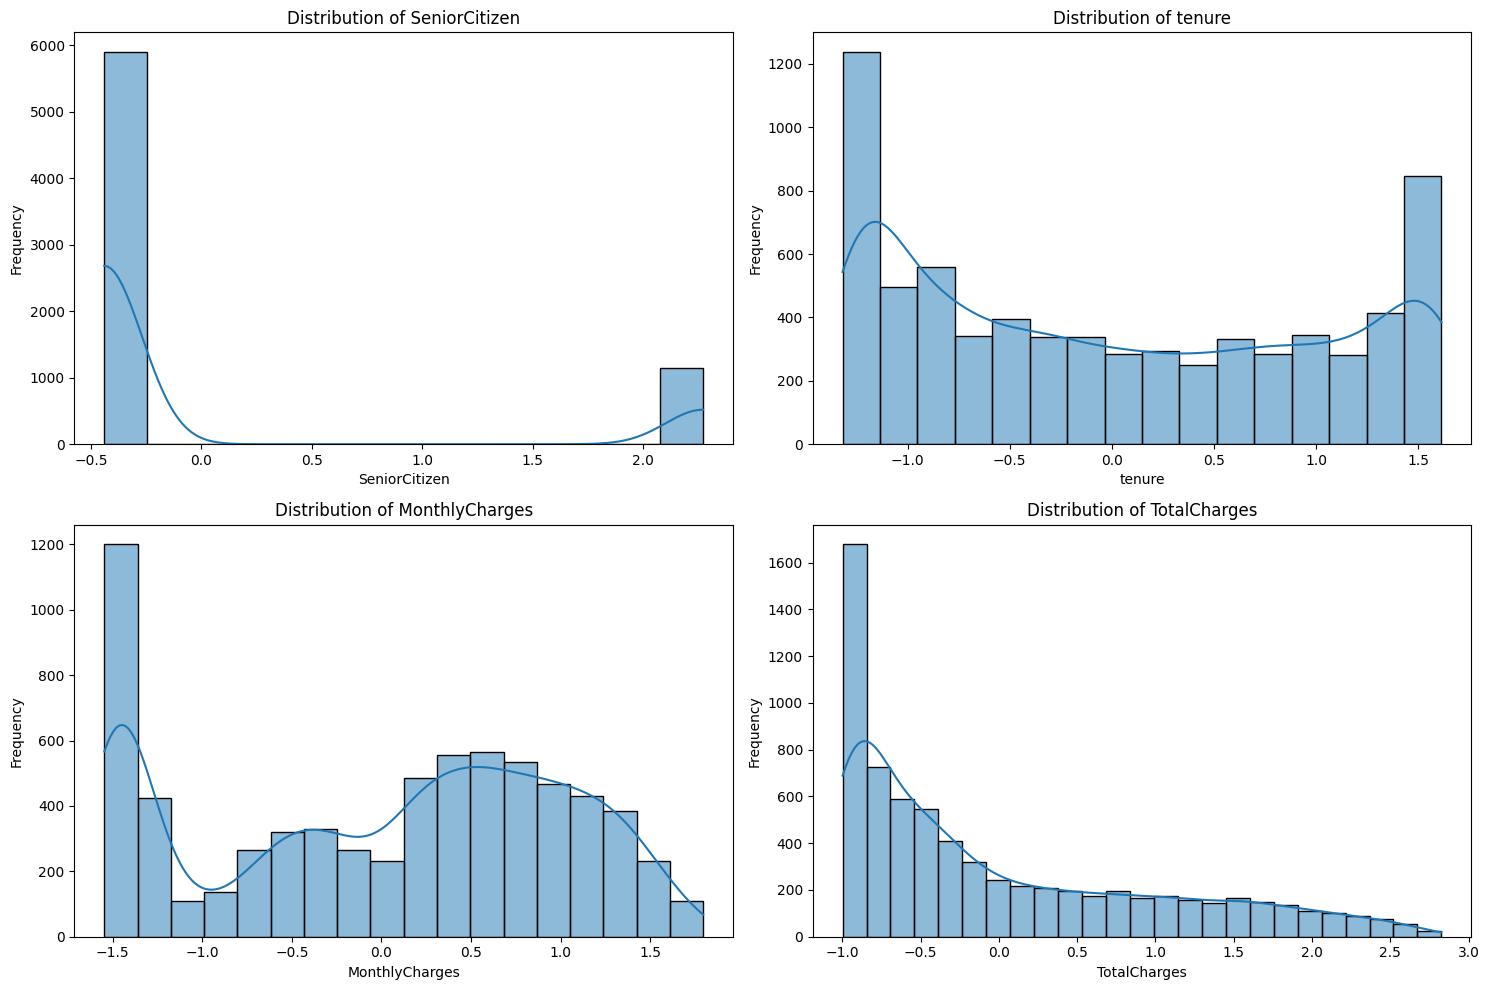

Histograms for numerical features displayed.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns for plotting
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Create histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Histograms for numerical features displayed.")

In [11]:
boolean_cols = df.select_dtypes(include=['bool']).columns.drop('Churn', errors='ignore')

print("Distribution of Boolean Features (Proportion of True values):\n")
for col in boolean_cols:
    true_proportion = df[col].mean() # mean of boolean column gives proportion of True
    print(f"{col}: {true_proportion:.2%}")

Distribution of Boolean Features (Proportion of True values):

gender_Male: 50.48%
Partner_Yes: 48.30%
Dependents_Yes: 29.96%
PhoneService_Yes: 90.32%
MultipleLines_No phone service: 9.68%
MultipleLines_Yes: 42.18%
InternetService_Fiber optic: 43.96%
InternetService_No: 21.67%
OnlineSecurity_No internet service: 21.67%
OnlineSecurity_Yes: 28.67%
OnlineBackup_No internet service: 21.67%
OnlineBackup_Yes: 34.49%
DeviceProtection_No internet service: 21.67%
DeviceProtection_Yes: 34.39%
TechSupport_No internet service: 21.67%
TechSupport_Yes: 29.02%
StreamingTV_No internet service: 21.67%
StreamingTV_Yes: 38.44%
StreamingMovies_No internet service: 21.67%
StreamingMovies_Yes: 38.79%
Contract_One year: 20.91%
Contract_Two year: 24.07%
PaperlessBilling_Yes: 59.22%
PaymentMethod_Credit card (automatic): 21.61%
PaymentMethod_Electronic check: 33.58%
PaymentMethod_Mailed check: 22.89%


Relationship between Numerical Features and Churn:
  SeniorCitizen: Mean for Non-Churn (0) = -0.09, Mean for Churn (1) = 0.25
  tenure: Mean for Non-Churn (0) = 0.21, Mean for Churn (1) = -0.59
  MonthlyCharges: Mean for Non-Churn (0) = -0.12, Mean for Churn (1) = 0.32
  TotalCharges: Mean for Non-Churn (0) = 0.12, Mean for Churn (1) = -0.33


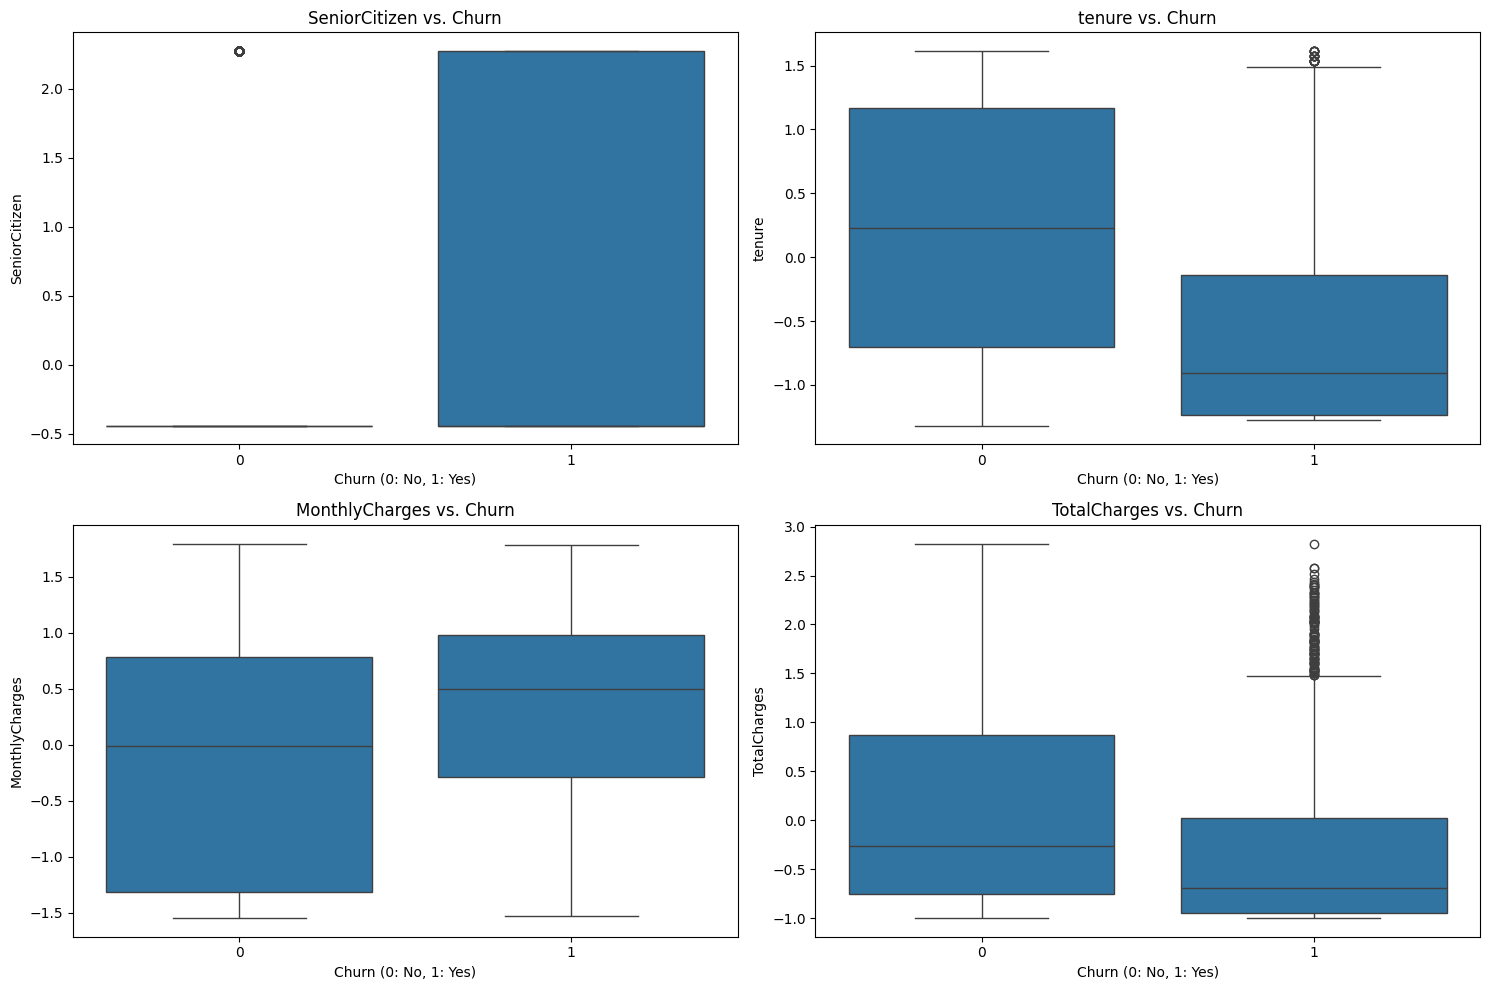

Box plots for numerical features vs. Churn displayed.


In [12]:
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

print("Relationship between Numerical Features and Churn:")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs. Churn')
    plt.xlabel('Churn (0: No, 1: Yes)')
    plt.ylabel(col)

    # Calculate and print mean for each churn group
    mean_churn_no = df[df['Churn'] == 0][col].mean()
    mean_churn_yes = df[df['Churn'] == 1][col].mean()
    print(f"  {col}: Mean for Non-Churn (0) = {mean_churn_no:.2f}, Mean for Churn (1) = {mean_churn_yes:.2f}")

plt.tight_layout()
plt.show()
print("Box plots for numerical features vs. Churn displayed.")

In [13]:
print("Relationship between Boolean Features and Churn:")
boolean_cols = df.select_dtypes(include=['bool']).columns.drop('Churn', errors='ignore')

for col in boolean_cols:
    print(f"\nChurn rate for '{col}':")
    # Calculate churn rate for 'False' group
    churn_rate_false = df[df[col] == False]['Churn'].mean() * 100
    print(f"  False group: {churn_rate_false:.2f}%")

    # Calculate churn rate for 'True' group
    churn_rate_true = df[df[col] == True]['Churn'].mean() * 100
    print(f"  True group: {churn_rate_true:.2f}%")


Relationship between Boolean Features and Churn:

Churn rate for 'gender_Male':
  False group: 26.92%
  True group: 26.16%

Churn rate for 'Partner_Yes':
  False group: 32.96%
  True group: 19.66%

Churn rate for 'Dependents_Yes':
  False group: 31.28%
  True group: 15.45%

Churn rate for 'PhoneService_Yes':
  False group: 24.93%
  True group: 26.71%

Churn rate for 'MultipleLines_No phone service':
  False group: 26.71%
  True group: 24.93%

Churn rate for 'MultipleLines_Yes':
  False group: 25.02%
  True group: 28.61%

Churn rate for 'InternetService_Fiber optic':
  False group: 14.49%
  True group: 41.89%

Churn rate for 'InternetService_No':
  False group: 31.83%
  True group: 7.40%

Churn rate for 'OnlineSecurity_No internet service':
  False group: 31.83%
  True group: 7.40%

Churn rate for 'OnlineSecurity_Yes':
  False group: 31.33%
  True group: 14.61%

Churn rate for 'OnlineBackup_No internet service':
  False group: 31.83%
  True group: 7.40%

Churn rate for 'OnlineBackup_Yes


Correlation with 'Churn':
Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes     

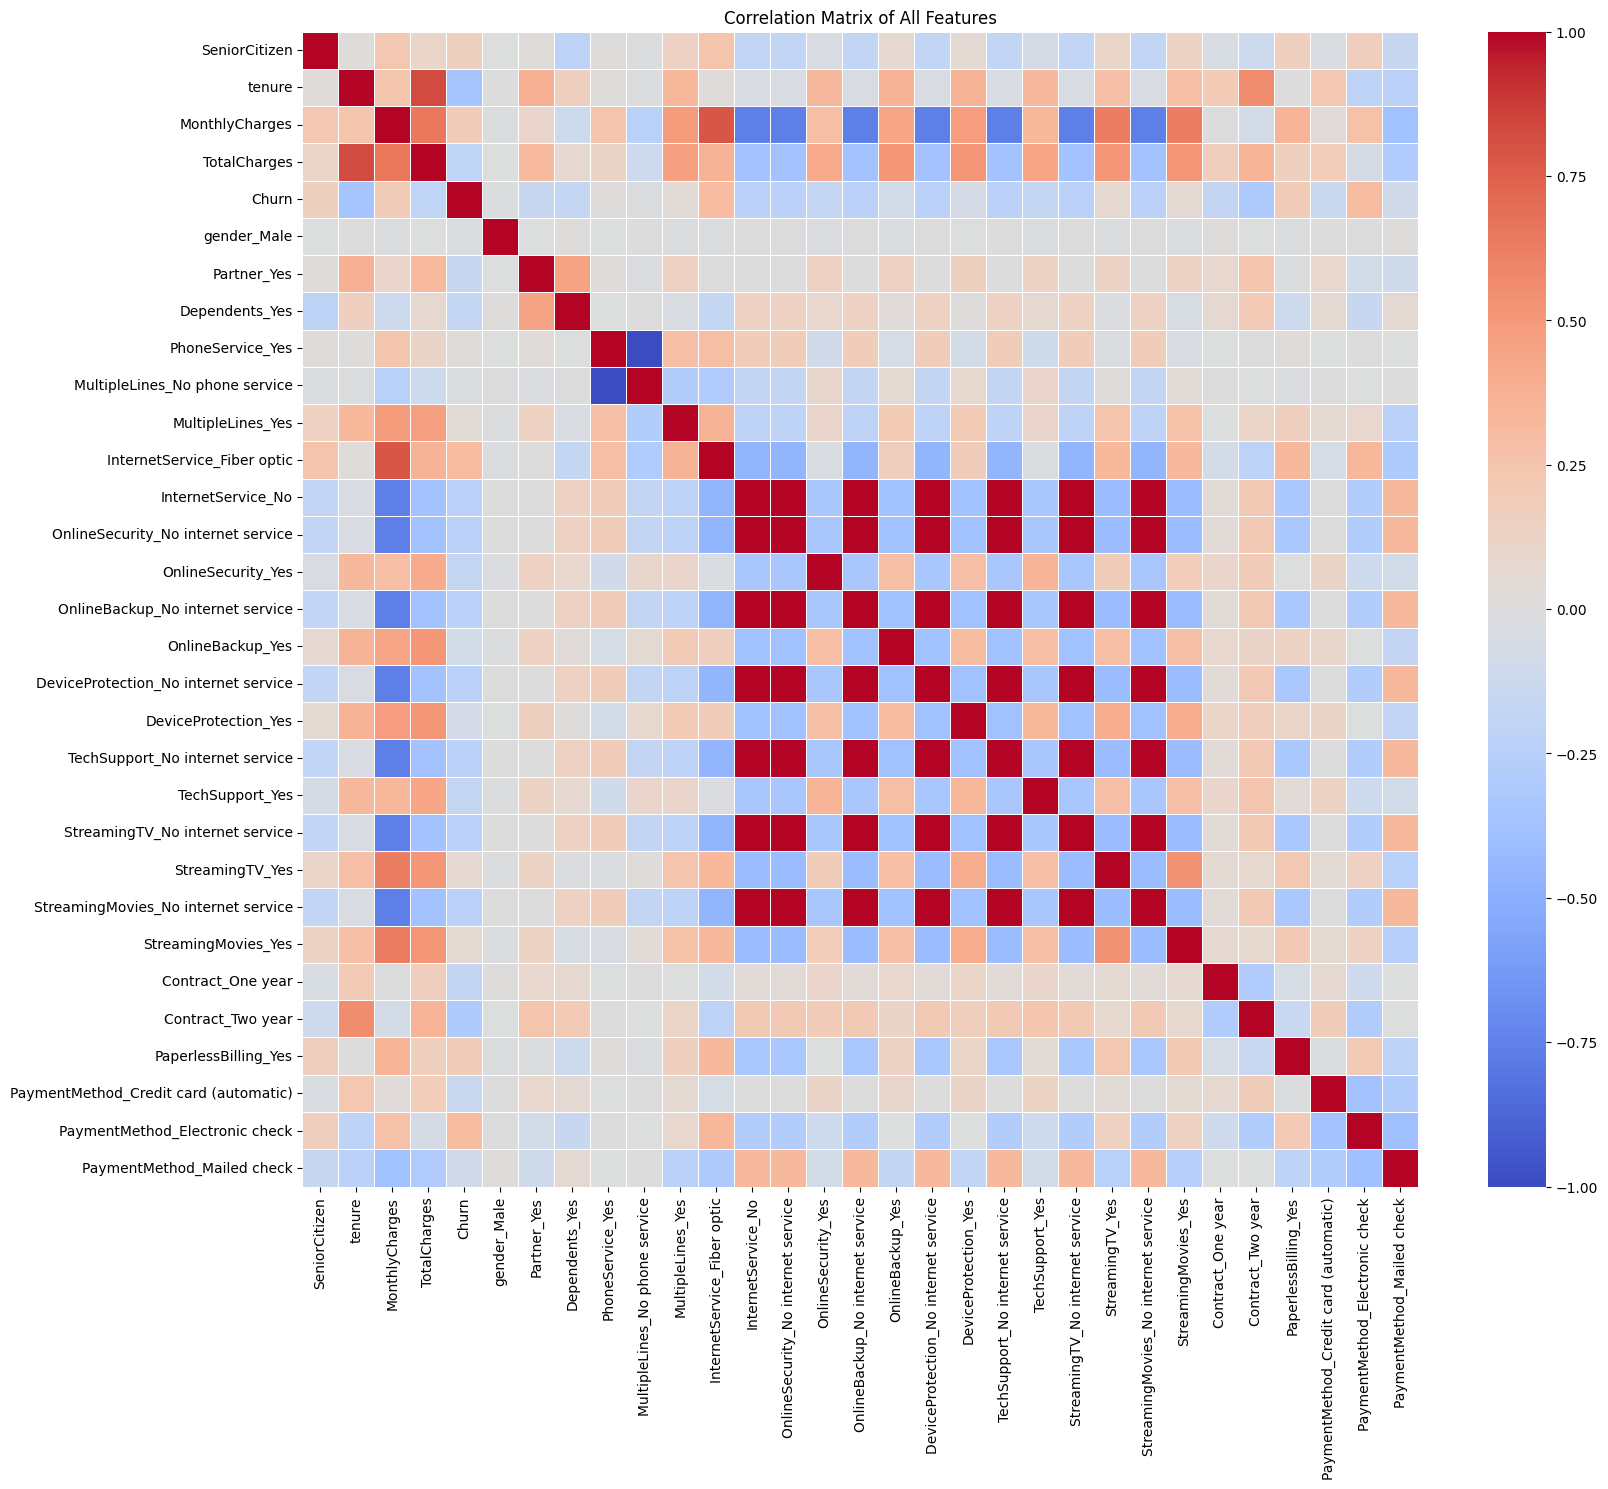

Correlation matrix heatmap displayed.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Filter correlations with 'Churn'
churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False)
print("\nCorrelation with 'Churn':")
print(churn_correlations)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features')
plt.show()

print("Correlation matrix heatmap displayed.")

## Data Visualization


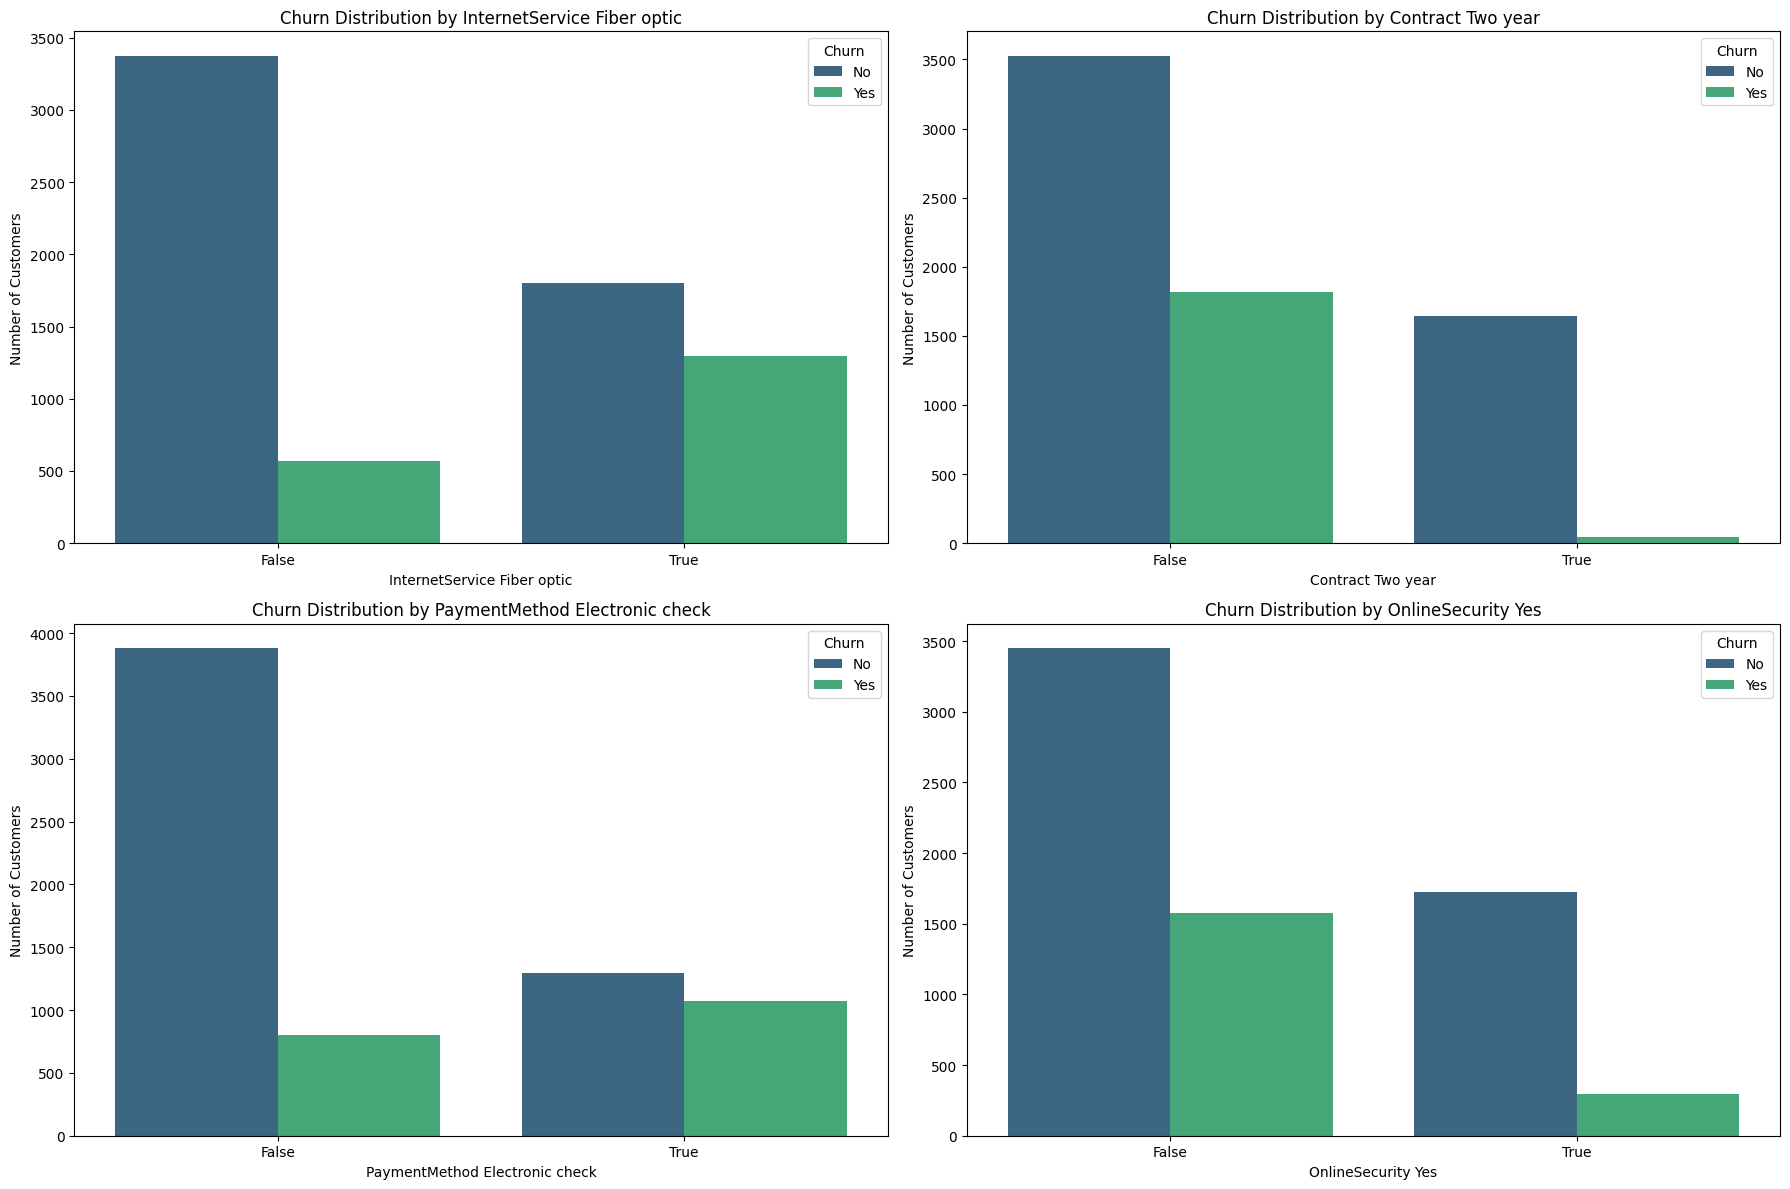

Count plots for key boolean features versus Churn displayed.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the key boolean features for visualization
key_boolean_features = [
    'InternetService_Fiber optic',
    'Contract_Two year',
    'PaymentMethod_Electronic check',
    'OnlineSecurity_Yes'
]

# Create a figure to hold multiple subplots
plt.figure(figsize=(18, 12))

# Generate count plots for each key boolean feature against 'Churn'
for i, col in enumerate(key_boolean_features):
    plt.subplot(2, 2, i + 1) # Create a 2x2 grid of subplots
    sns.countplot(x=col, hue='Churn', data=df, palette='viridis')
    plt.title(f'Churn Distribution by {col.replace("_", " ")}')
    plt.xlabel(col.replace("_", " "))
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()
print("Count plots for key boolean features versus Churn displayed.")

## Build Prediction Model


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 1. Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']
print("Features (X) and target (y) separated.")

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into training and testing sets. Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# 5. Instantiate a LogisticRegression model
# Using 'liblinear' solver which is good for smaller datasets and handles L1/L2 regularization.
model = LogisticRegression(solver='liblinear', random_state=42)
print("Logistic Regression model instantiated.")

# 6. Train the instantiated model
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Features (X) and target (y) separated.
Data split into training and testing sets. Training samples: 5634, Testing samples: 1409
Logistic Regression model instantiated.
Logistic Regression model trained successfully.


## Evaluate and Improve Model Accuracy


Predictions made on the test set.

Model Evaluation Metrics:
Accuracy: 0.8204
Precision: 0.6829
Recall: 0.6005
F1-Score: 0.6391
AUC-ROC: 0.8622

Confusion Matrix:
[[932 104]
 [149 224]]


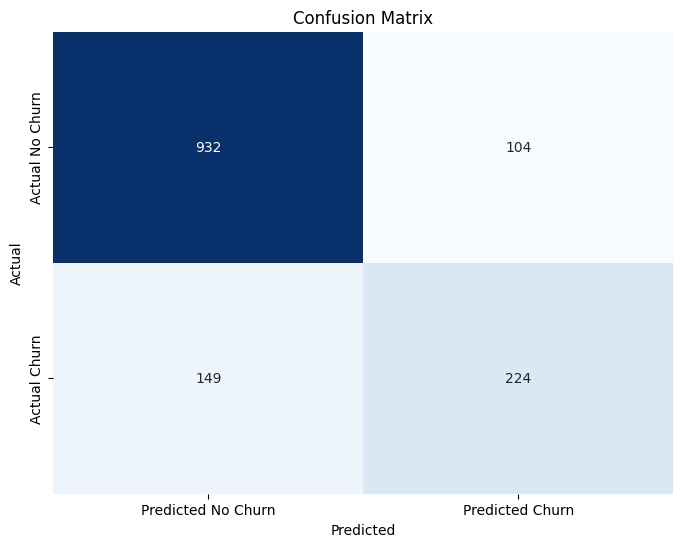


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# 1. Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class (Churn=1)
print("Predictions made on the test set.")

# 3. Calculate and print the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f"\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# 4. Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:\n{cm}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 5. Print the classification report
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
